In [286]:
import pandas as pd
import numpy as np
import os

In [287]:
with open(r"C:\Users\Shardul Janaskar\Downloads\sentiment_labelled\sentiment labelled sentences\imdb_labelled.txt", 'r') as infile, \
     open(r"C:\Users\Shardul Janaskar\Downloads\sentiment_labelled\sentiment labelled sentences\imdb_labelled_new.txt", 'w') as outfile:
    data = infile.read()
    data = data.replace('"', '')
    outfile.write(data)

In [288]:
imdb_df = pd.read_csv(r'C:\Users\Shardul Janaskar\Downloads\sentiment_labelled\sentiment labelled sentences\imdb_labelled_new.txt',sep = '\t',header = None)

In [289]:
imdb_df.columns = ['sentence','label']

In [290]:
imdb_df.shape

(1000, 2)

In [291]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
sentence    1000 non-null object
label       1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [292]:
sentences = imdb_df['sentence'].tolist()

In [293]:
from sklearn.feature_extraction.text import CountVectorizer

In [294]:
countvec = CountVectorizer()

In [295]:
countvec.fit(sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [296]:
mat = countvec.transform(sentences).toarray()

In [297]:
mat.shape

(1000, 3047)

In [298]:
X = mat
y = imdb_df['label']

In [299]:
from sklearn.model_selection import train_test_split as tts

In [300]:
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.3,random_state = 42)

In [301]:
from sklearn.naive_bayes import GaussianNB

In [302]:
nb = GaussianNB()

In [303]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [304]:
y_pred = nb.predict(X_test)

In [305]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[117  23]
 [ 66  94]]


In [306]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.84      0.72       140
           1       0.80      0.59      0.68       160

   micro avg       0.70      0.70      0.70       300
   macro avg       0.72      0.71      0.70       300
weighted avg       0.73      0.70      0.70       300



In [307]:
from sklearn.metrics import accuracy_score

In [308]:
accuracy_score(y_test,y_pred)

0.7033333333333334

In [309]:
sentences = imdb_df['sentence'].tolist()

In [310]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [311]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [312]:
processed = preprocess_data(sentences)

In [313]:
token = [" ".join(token) for token in processed]

In [314]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [315]:
tfidf = TfidfVectorizer()

In [316]:
cv= CountVectorizer()

In [317]:
cv.fit(token)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [318]:
X = cv.transform(token).toarray()

In [319]:
y = imdb_df['label']

In [320]:
X_train, X_test, y_train, y_test = tts(X,y,test_size= 0.2,random_state =42)

In [321]:
from sklearn.naive_bayes import MultinomialNB

In [322]:
multinomialnb = MultinomialNB()

In [323]:
multinomialnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [324]:
ypred= multinomialnb.predict(X_test)

In [325]:
accuracy_score(y_test,ypred)

0.815

In [326]:
from sklearn.linear_model import LogisticRegression

In [327]:
log_reg = LogisticRegression()

In [328]:
log_reg.fit(X_train,y_train)

C:\Users\Shardul Janaskar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [329]:
log_reg.predict(X_test)

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [330]:
accuracy_score(y_test,log_reg.predict(X_test))

0.79

In [331]:
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical

In [332]:
ip_dim = X_train.shape[1]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [333]:
model = Sequential()

In [334]:
model.add(layers.Dense(10,input_dim = ip_dim,activation = 'relu'))
model.add(layers.Dense(2,activation ='softmax'))

In [335]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                24100     
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 22        
Total params: 24,122
Trainable params: 24,122
Non-trainable params: 0
_________________________________________________________________


In [336]:
history = model.fit(X_train,y_train,epochs = 100,validation_split= 0.15,batch_size=10)
loss,accuracy = model.evaluate(X_train,y_train,verbose =False)
print("train_accuracy:" +accuracy)
loss,accuracy = model.evaluate(X_test,y_test,verbose =False)
print("test_accuracy:" +accuracy)


Train on 680 samples, validate on 120 samples
Epoch 1/100
680/680 [==============================] - 1s 1ms/step - loss: 0.6917 - acc: 0.5676 - val_loss: 0.6824 - val_acc: 0.6833
Epoch 2/100
680/680 [==============================] - 0s 250us/step - loss: 0.6433 - acc: 0.8294 - val_loss: 0.6398 - val_acc: 0.7667
Epoch 3/100
680/680 [==============================] - 0s 234us/step - loss: 0.5455 - acc: 0.9044 - val_loss: 0.5512 - val_acc: 0.8583
Epoch 4/100
680/680 [==============================] - 0s 241us/step - loss: 0.4093 - acc: 0.9397 - val_loss: 0.4714 - val_acc: 0.8500
Epoch 5/100
680/680 [==============================] - 0s 255us/step - loss: 0.3007 - acc: 0.9515 - val_loss: 0.4074 - val_acc: 0.8833
Epoch 6/100
680/680 [==============================] - 0s 277us/step - loss: 0.2268 - acc: 0.9559 - val_loss: 0.3688 - val_acc: 0.9000
Epoch 7/100
680/680 [==============================] - 0s 294us/step - loss: 0.1780 - acc: 0.9647 - val_loss: 0.3411 - val_acc: 0.8750
Epoch 8/100

Epoch 61/100
680/680 [==============================] - 0s 249us/step - loss: 0.0081 - acc: 0.9971 - val_loss: 0.4958 - val_acc: 0.8750
Epoch 62/100
680/680 [==============================] - 0s 246us/step - loss: 0.0079 - acc: 0.9971 - val_loss: 0.4985 - val_acc: 0.8750
Epoch 63/100
680/680 [==============================] - 0s 322us/step - loss: 0.0078 - acc: 0.9971 - val_loss: 0.5079 - val_acc: 0.8667
Epoch 64/100
680/680 [==============================] - 0s 249us/step - loss: 0.0075 - acc: 0.9971 - val_loss: 0.5160 - val_acc: 0.8667
Epoch 65/100
680/680 [==============================] - 0s 238us/step - loss: 0.0073 - acc: 0.9971 - val_loss: 0.5227 - val_acc: 0.8667
Epoch 66/100
680/680 [==============================] - 0s 233us/step - loss: 0.0073 - acc: 0.9971 - val_loss: 0.5296 - val_acc: 0.8667
Epoch 67/100
680/680 [==============================] - 0s 228us/step - loss: 0.0072 - acc: 0.9971 - val_loss: 0.5332 - val_acc: 0.8667
Epoch 68/100
680/680 [==========================

TypeError: must be str, not numpy.float64

In [337]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')



In [338]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1,len(acc)+1)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(x,acc,'b',label= 'training_acc')
    plt.plot(x,val_acc,'r',label= 'val_acc')
    plt.title("training and val acc")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(x,loss,'b',label= 'training_loss')
    plt.plot(x,val_loss,'r',label= 'val_loss')
    plt.title("training and val loss")
    plt.legend()
    

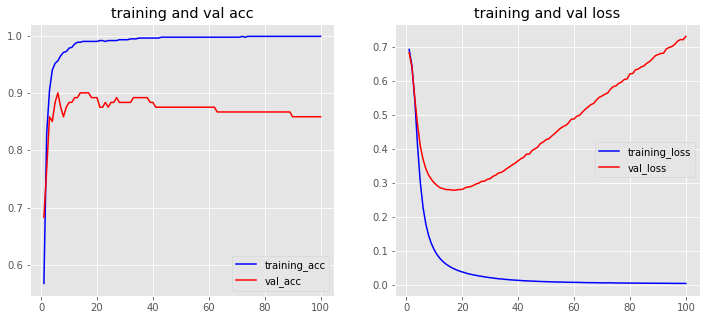

In [339]:
plot_history(history)

In [340]:
sents = imdb_df['sentence'].values
y = imdb_df['label'].values
sents_train, sents_test,y_train,y_test = tts(sents,y,test_size = 0.25,random_state = 1000)

In [341]:
from keras.preprocessing.text import Tokenizer

In [342]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(sents_train)

In [343]:
X_train = tokenizer.texts_to_sequences(sents_train)
X_test = tokenizer.texts_to_sequences(sents_test)

In [344]:
vocab_size = len(tokenizer.word_index)+1

In [345]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 1000
X_train = pad_sequences(X_train,padding ='post',maxlen = maxlen)
X_test = pad_sequences(X_test,padding ='post',maxlen = maxlen)

In [346]:
print(X_train[0,:])

[ 64  35 123   3 315 409   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [347]:
from keras.models import Sequential
from keras import layers

In [348]:
embedding_dim = 50
model = Sequential(0)

In [349]:
model.add(layers.Embedding(input_dim=vocab_size,output_dim= embedding_dim,input_length = maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 50)          132500    
_________________________________________________________________
flatten_3 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                500010    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 632,521
Trainable params: 632,521
Non-trainable params: 0
_________________________________________________________________


In [350]:
model.fit(X_train,y_train,epochs = 100,validation_data=(X_test,y_test),batch_size=10)

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6977 - acc: 0.4693 - val_loss: 0.6932 - val_acc: 0.4480
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.6931 - acc: 0.5173 - val_loss: 0.6936 - val_acc: 0.4480
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6930 - acc: 0.5173 - val_loss: 0.6941 - val_acc: 0.4480
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6929 - acc: 0.5173 - val_loss: 0.6943 - val_acc: 0.4480
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6929 - acc: 0.5173 - val_loss: 0.6947 - val_acc: 0.4480
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6928 - acc: 0.5173 - val_loss: 0.6950 - val_acc: 0.4480
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6927 - acc: 0.5173 - val_loss: 0.6951 - val_acc: 0.4480
Epoch 8/100
750/750 [==

KeyboardInterrupt: 

In [351]:
from keras.layers import Conv1D, GlobalMaxPool1D

In [352]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1000, 100)         265000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 996, 128)          64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 330,429
Trainable params: 330,429
Non-trainable params: 0
_________________________________________________________________


In [354]:
hist = model.fit(X_train, y_train,epochs = 10,validation_data=(X_test,y_test),batch_size=10)

Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 16s 21ms/step - loss: 9.6466e-04 - acc: 1.0000 - val_loss: 0.7232 - val_acc: 0.7480
Epoch 2/10
750/750 [==============================] - 16s 21ms/step - loss: 7.5496e-04 - acc: 1.0000 - val_loss: 0.7379 - val_acc: 0.7480
Epoch 3/10
750/750 [==============================] - 16s 21ms/step - loss: 6.0552e-04 - acc: 1.0000 - val_loss: 0.7509 - val_acc: 0.748004 - acc: 
Epoch 4/10
750/750 [==============================] - 16s 21ms/step - loss: 5.0081e-04 - acc: 1.0000 - val_loss: 0.7636 - val_acc: 0.7480
Epoch 5/10
750/750 [==============================] - 16s 21ms/step - loss: 4.1580e-04 - acc: 1.0000 - val_loss: 0.7746 - val_acc: 0.7480
Epoch 6/10
750/750 [==============================] - 16s 21ms/step - loss: 3.5080e-04 - acc: 1.0000 - val_loss: 0.7858 - val_acc: 0.7480
Epoch 7/10
750/750 [==============================] - 16s 21ms/step - loss: 3.0060e-04 - acc: 1.0000 - val_loss: 0.7

In [358]:
loss,accuracy = model.evaluate(X_train,y_train,verbose =False)
print("train_accuracy:" +accuracy)
loss,accuracy = model.evaluate(X_test,y_test,verbose =False)
print("test_accuracy:" +accuracy)



TypeError: must be str, not numpy.float64

In [ ]:
plot_history(hist)